<Font color = '#ff0000'><h1><center>WhatsApp Group Chat Analysis - Data Analysis Project</center></h1>
<img src=https://upload.wikimedia.org/wikipedia/commons/6/6b/WhatsApp.svg alt="Drawing" style="width: 200px;"/>

### <Font color = 'ff0000'>Overview

> [<Font color = '0000'>1. Importing required library](#import-library)<br>
> [<Font color = '0000'>2. Data Extraction](#data-extraction)<br>
    >> [<Font color = '0000'>1. Extract date from text file using regex](#extract-date)<br>
    >> [<Font color = '0000'>2. Extract Username from text file using regex](#extract-username)<br>
    >> [<Font color = '0000'>3. Extract date, time, author, message from the text file using regex](#extract-date-time)<br>
    >> [<Font color = '0000'>4. Creating DataFrame](#dataframe)<br></blockquote>
> [<Font color = '0000'>3. Data Wrangling](#data-wrangling)<br>
    >>> [<Font color = '0000'>1. First look at new born Dataset](#first-look)<br>
    >> [<Font color = '0000'>2. Checking basic information of Dataset](#basic-information)<br>
    >> [<Font color = '0000'>3. Checking No. of null values in Dataset](#null-values)<br>
    >> [<Font color = '0000'>4. Droping NaN values](#nan-values)<br>
    >> [<Font color = '0000'>5. Data Generation for better analysis](#feature-generation)<br>
    >> [<Font color = '0000'>6. Counting No. of word's and letter's in each message](#counting-words)<br>
    >> [<Font color = '0000'>7. Counting No. of link's present in Messages](#counting-links)<br>
    >> [<Font color = '0000'>8. Counting No. of Media Messages](#counting-media)<br>
    >> [<Font color = '0000'>9. Final look of DataFrame after Data Wrangling](#final-look)<br></blockquote>
> [<Font color = '0000'>4. Basic Statistics](#basic-sts)<br>
    >>>> [<Font color = '0000'>1. Basic Statistics of each Author](#each-author)<br>
    >> [<Font color = '0000'>2. Total Words in Chat](#total-words)<br>
    >> [<Font color = '0000'>3. Creating Word Cloud of mostly used word's in Chat](#word-cloud)<br>
    >> [<Font color = '0000'>4. No. of Messages sent by each User](#each-user)<br>
    >> [<Font color = '0000'>5. No. of Messages sent on each Day of Week](#each-day-of-week)<br></blockquote>     
> [<Font color = '0000'>5. Exploratory Data Analysis(EDA) on WhatsApp Chat](#eda)<br>
    <blockquote>[<Font color = '0000'>1. Visual Representation of Mostly active member of group](#most-active-member)<br>
    >> [<Font color = '0000'>2. Mostly active day of week](#Mostly-active-day-of-week)<br>
    >> [<Font color = '0000'>3. Top-10 visual media contributor of Group](#media-con)<br>
    >> [<Font color = '0000'>4. Top-10 Author who uses max no. of words in there messages](#max-word)<br>
    >> [<Font color = '0000'>5. Top-10 Authors who has shared max no. of links in Group](#max-link)<br>
    >> [<Font color = '0000'>6. Time whenever Group having high traffic](#time)<br>
    >> [<Font color = '0000'>7. Analysis of most suitable time slot of a day](#time-slot)<br>
    >> [<Font color = '0000'>8. Word Cloud of top-5 highly active member's of Group](#top5-word-cloud)<br>
    >> [<Font color = '0000'>9. Date on which Group was highly active](#date-on)<br>
    >> [<Font color = '0000'>10. Analysis of no. of messages using Time Series Plot](#time-series-plot)<br>
    >> [<Font color = '0000'>11. Mostly active Month](#active-month)<br>
    >> [<Font color = '0000'>12. Analysis of mostly active month using Line Plot](#line-plot)<br>
    >> [<Font color = '0000'>13. Mostly active year whenever max. no. of messages sent](#active-year)<br>
    >> [<Font color = '0000'>14. Analysis of most active Day and Time in the group](#heat-map)<br>

<a id="import-library"></a>
### <Font color = 'ff0000'>Importing required Library

In [513]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import *
import datetime as dt
from matplotlib.ticker import MaxNLocator
import regex
import emoji
from seaborn import *
from heatmap import heatmap
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *
from plotly import express as px
import plotly.express as px

<a id="data-extraction"></a>
# <center>Data Extraction

<a id="extract-date"></a>
### <Font color = 'ff0000'>Creating regex pattern to extracting Date from chat file.  

<b>It actually usese the concept of regex(regular expression) which play major role in these whole analysis.

In [514]:
def startsWithDateAndTime(s):  
    # regex pattern for date.
    pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (AM|PM) -'
#     pattern = '^([0-9]+)(\/)([0-9]+)(\/)([0-9][0-9]), ([0-9]+):([0-9][0-9]) (am|pm) -'

    result = re.match(pattern, s)
    if result:
        return result
    return False

<a id="extract-username"></a>
### <Font color = 'ff0000'>Creating regex pattern to extracting the username of Author. 

In [515]:
# Finds username of any given format.
def FindAuthor(s):
    patterns = [
        '([\w]+):',                        # First Name
        '([\w]+[\s]+[\w]+):',              # First Name + Last Name
        '([\w]+[\s]+[\w]+[\s]+[\w]+):',    # First Name + Middle Name + Last Name
        '([+]\d{2} \d{5} \d{5}):',         # Mobile Number (India no.)
        '([+]\d{2} \d{3} \d{3} \d{4}):',   # Mobile Number (US no.)
        '([\w]+)[\u263a-\U0001f999]+:',   # Name and Emoji 
    ]
    pattern = '^' + '|'.join(patterns)
    result = re.match(pattern, s)
    if result:
        return result
    return False

<a id="import-date-time"></a>
### <Font color = 'ff0000'>Extracting date, time, author, message from the file.

In [516]:
def getDataPoint(line):   
    splitLine = line.split(' - ') 
    dateTime = splitLine[0]
    date, time = dateTime.split(', ') 
    message = ' '.join(splitLine[1:])
    if FindAuthor(message) : 
        splitMessage = message.split(': ') 
        author = splitMessage[0] 
        message = ' '.join(splitMessage[1:])
    else:
        author = None
    
    return date, time, author, message

<a id="dataframe"></a>
### <Font color = 'ff0000'>Finally extracting data and creating dataframe and storing data in dataframe. 

In [517]:
parsedData = [] # List to keep track of data so it can be used by a Pandas dataframe
# Uploading exported chat file
conversationPath = 'New WhatsApp Chat.txt' # chat file
with open(conversationPath, encoding="utf-8") as fp:
    # Skipping first line of the file because contains information related to something about end-to-end encryption
    fp.readline() 
    messageBuffer = [] 
    date, time, author = None, None, None
    while True:
        line = fp.readline() 
        if not line: 
            break
        line = line.strip() 
        if startsWithDateAndTime(line): 
            if len(messageBuffer) > 0: 
                parsedData.append([date, time, author, ' '.join(messageBuffer)]) 
            messageBuffer.clear() 
            date, time, author, message = getDataPoint(line) 
            messageBuffer.append(message) 
        else:
            messageBuffer.append(line)
   
df1 = pd.DataFrame(parsedData, columns=['Date', 'Time', 'Author', 'Message']) # Initialising a pandas Dataframe.
# changing datatype of "Date" column.
df1["Date"] = pd.to_datetime(df1["Date"])

<a id="data-wrangling"></a>
# <center>Data Wrangling

<a id="first-look"></a>
### <Font color = 'ff0000'>First look of our new born Dataset from file.

In [518]:
df1.head(2)

,Date,Time,Author,Message
0,2019-07-03,6:49 PM,None,Shubham Patil changed this group's icon
1,2019-06-29,2:31 PM,None,"Pranjali Jadhav created group ""SE Comp 2019-20..."


<a id="basic-information"></a>
### <Font color = 'ff0000'>Checking basic information of dataset. 

<b>Here in our dataset we have 4248 rows where in 'Author' column we have some Nan values so we have to handle the Nan values for better analysis. 

In [519]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4248 entries, 0 to 4247
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     4248 non-null   datetime64[ns]
 1   Time     4248 non-null   object        
 2   Author   3635 non-null   object        
 3   Message  4248 non-null   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 132.9+ KB


<a id="null-values"></a>
### <Font color = 'ff0000'>Checking no. of null values in dataset. 

In [520]:
df1.isnull().sum()

Date         0
Time         0
Author     613
Message      0
dtype: int64

<b>From the above datafram we conclude that None value at author is nothing but a alert when someone joined or removed the group.  

<a id="nan-values"></a>
### <Font color = 'ff0000'>Droping NaN values. 

In [521]:
df1 = df1.dropna()

In [522]:
df1 = df1.reset_index(drop=True)

In [523]:
df1.shape

(3635, 4)

### <Font color = 'ff0000'>Checking no. of author's in group. 

In [524]:
df1['Author'].nunique()

109

### <Font color = 'ff0000'>Authors present in group. 

In [525]:
df1['Author'].unique()

array(['Saurabh Waje', 'Pranjali Jadhav', 'Yash Kevalramani',
       'Antapurkar Mam', '+91 86230 70942', 'Snehal Patil',
       'Mrunali Naik', 'Dhiraj Bari', 'Supriya Mahajan', 'Deepak',
       'Shubham Dhage', 'Manisha Butkar', '+91 95185 39882',
       '+91 75888 27384', 'Abhijit Chavan', 'Aparna', 'Jay Sharma',
       'Bharati', 'Gayatri Kadam', 'Rajendra Nagare', '+91 83780 67461',
       'Ashutosh Mali', '+91 75075 42207', '+91 91583 86084',
       'Prachi Chikhale', 'Omkar Khute', '+91 90213 92751', 'Pooja',
       '+91 91565 47327', 'Samarth', '+91 94230 74157', '+91 94213 03162',
       'Samadhan Shinde', 'Kalyani', 'Dipali Nagare', 'Shravani Naik',
       'Mokshini', 'Chaskar Prasad', 'Akshda', '+91 77209 47219',
       'Prasanna Shinde', 'Charuli', 'Priti Rahane', '+91 77095 30672',
       '+91 96236 39269', '+91 95456 76626', '+91 98225 11799',
       'Akshata Patil', 'Ronil Patil', '+91 76667 53343',
       '+91 89754 48105', 'Abhishek Ghorpade', 'Sanket Bhavar',
       '

<a id="feature-generation"></a>
### <Font color = 'ff0000'>Adding one more column of 'Day' in dataset for better analysis. 

<b>It is using python datetime library using which we are easily detecting 'Day' at particular 'Date'.

In [526]:
weeks = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thrusday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}
df1['Day'] = df1['Date'].dt.weekday.map(weeks)

### <Font color = 'ff0000'>Rearranging the columns of dataframe    

In [527]:
df1 = df1[['Date','Day','Time','Author','Message']]

In [528]:
df1['Day'] = df1['Day'].astype('category')

In [529]:
df1.head(2)

,Date,Day,Time,Author,Message
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp..."
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...


<a id="counting-words"></a>
### <Font color = 'ff0000'>Function to count no. of letters and words in particular message. 

In [530]:
df1['Letter\'s'] = df1['Message'].apply(lambda s : len(s))          # Count number of letters in each message
df1['Word\'s'] = df1['Message'].apply(lambda s : len(s.split(' ')))   # Count number of word's in each message

In [531]:
df1.dtypes

Date        datetime64[ns]
Day               category
Time                object
Author              object
Message             object
Letter's             int64
Word's               int64
dtype: object

### <Font color = 'ff0000'>Updated Dataframe 

In [532]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5


<a id="counting-links"></a>
### <Font color = 'ff0000'>Function to count number of links in messages. 

<b>It will add one extra column as well named as 'Url_Count' which count the number of links available in particular message.

In [533]:
URLPATTERN = r'(https?://\S+)'
df1['Url_Count'] = df1.Message.apply(lambda x: re.findall(URLPATTERN, x)).str.len()
links = np.sum(df1.Url_Count)

<a id="counting-media"></a>
### <Font color = 'ff0000'>Function to count number of media in Chat. 

<b>It will add one extra column as well named as 'Media_Count' which count the number of Media available in particular message.

In [534]:
MEDIAPATTERN = r'<Media omitted>'
df1['Media_Count'] = df1.Message.apply(lambda x : re.findall(MEDIAPATTERN, x)).str.len()
media = np.sum(df1.Media_Count)

In [535]:
print('No. of links available in chat : {}\nNo. of Media messages available in chat : {}'.format(links,media))

No. of links available in chat : 455
No. of Media messages available in chat : 601


<a id="final-look"></a>
### <Font color = 'ff0000'>Updated Dataframe 

In [536]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0


<a id="basic-sts"></a>
# <center>Basic Statistics 

In [537]:
total_messages = df1.shape[0]
media_messages = df1[df1['Message'] == '<Media omitted>'].shape[0]
links = np.sum(df1.Url_Count)

In [538]:
print('Group Chatting Stats : ')
print('Total Number of Messages : {}'.format(total_messages))
print('Total Number of Media Messages : {}'.format(media_messages))
print('Total Number of Links : {}'.format(links))

Group Chatting Stats : 
Total Number of Messages : 3635
Total Number of Media Messages : 601
Total Number of Links : 455


<a id="each-author"></a>
### <Font color = 'ff0000'>Extracting Basic Statistics of each Author. 

In [539]:
l = df1.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df1[df1["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(f'--> Stats of {l[i]} <-- ')
    
  # shape will print number of rows which indirectly means the number of messages
  print('Total Message Sent : ', req_df.shape[0])
    
  #Word_Count contains of total words in one message. Sum of all words/ Total Messages will yield words per message
  words_per_message = (np.sum(req_df['Word\'s']))/req_df.shape[0]
  w_p_m = round(words_per_message)
  print('Average Words per Message(Rounded) : ', w_p_m)

  #media conists of media messages
  media = sum(req_df["Media_Count"])
  print('Total Media Message Sent : ', media)
    
  #links consist of total links
  links = sum(req_df["Url_Count"])   
  print('Total Links Shared : ', links)   
  print()
  print('----------------------------------------------------------\n')  

--> Stats of Saurabh Waje <-- 
Total Message Sent :  22
Average Words per Message(Rounded) :  10
Total Media Message Sent :  3
Total Links Shared :  2

----------------------------------------------------------

--> Stats of Pranjali Jadhav <-- 
Total Message Sent :  224
Average Words per Message(Rounded) :  14
Total Media Message Sent :  60
Total Links Shared :  11

----------------------------------------------------------

--> Stats of Yash Kevalramani <-- 
Total Message Sent :  118
Average Words per Message(Rounded) :  7
Total Media Message Sent :  11
Total Links Shared :  8

----------------------------------------------------------

--> Stats of Antapurkar Mam <-- 
Total Message Sent :  215
Average Words per Message(Rounded) :  11
Total Media Message Sent :  20
Total Links Shared :  20

----------------------------------------------------------

--> Stats of +91 86230 70942 <-- 
Total Message Sent :  2
Average Words per Message(Rounded) :  6
Total Media Message Sent :  1
Total Li

----------------------------------------------------------

--> Stats of +91 94206 28218 <-- 
Total Message Sent :  63
Average Words per Message(Rounded) :  26
Total Media Message Sent :  8
Total Links Shared :  10

----------------------------------------------------------

--> Stats of +91 77769 53424 <-- 
Total Message Sent :  7
Average Words per Message(Rounded) :  2
Total Media Message Sent :  1
Total Links Shared :  0

----------------------------------------------------------

--> Stats of +91 89759 82634 <-- 
Total Message Sent :  13
Average Words per Message(Rounded) :  4
Total Media Message Sent :  1
Total Links Shared :  0

----------------------------------------------------------

--> Stats of +91 73871 43712 <-- 
Total Message Sent :  6
Average Words per Message(Rounded) :  2
Total Media Message Sent :  1
Total Links Shared :  0

----------------------------------------------------------

--> Stats of +91 73504 52524 <-- 
Total Message Sent :  7
Average Words per Message(

<a id="total-words"></a>
### <Font color = 'ff0000'>Total Words in Chat

In [540]:
text = ' '.join(review for review in df1.Message)
print ("Total words in Chat : {}".format(len(text)))

Total words in Chat : 330248


<a id="word-cloud"></a>
### <Font color = 'ff0000'>Creating Word Cloud of mostly used word's in Chat.

In [541]:
df1.Message.head(5)

0    Hii there, our official gmail group of se comp...
1    mcoerc-se-comp2019-20@googlegroups.com This is...
2    ⚠️⚠️ Those who didn't given ur email add to ad...
3    Dear Students Please do not leave campus witho...
4                                      <Media omitted>
Name: Message, dtype: object

In [542]:
hindi = [chr(c) for c in range(0x0900, 0x097f)]

In [543]:
df2 = df1[~(df1['Message'].str.contains('<Media omitted>')) & 
          ~(df1['Message'].str.contains('This message was deleted')) &
          ~(df1['Message'].str.contains('https://')) &
          ~(df1.Message.str.contains('|'.join(hindi)))
         ]

In [544]:
df2.reset_index(inplace = True)

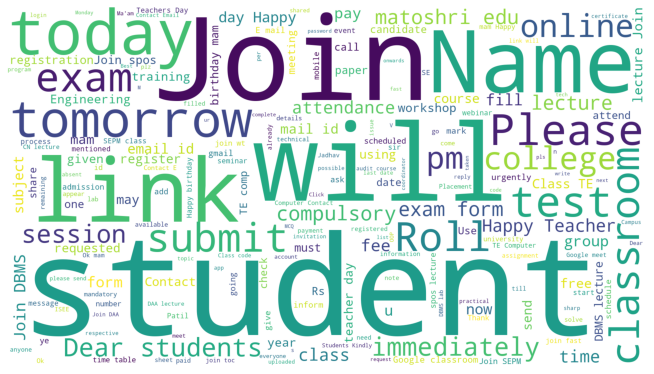

In [545]:
text = " ".join(review for review in df2.Message)
wordcloud = WordCloud(width=1920, height=1080,background_color="white",stopwords=STOPWORDS,random_state=42).generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

<a id="each-user"></a>
### <Font color = 'ff0000'>No. of Messages sent by each Author. 

In [546]:
# Creates a list of unique Authors
l = df1.Author.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df1[df1["Author"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])


Saurabh Waje   ->   22
Pranjali Jadhav   ->   224
Yash Kevalramani   ->   118
Antapurkar Mam   ->   215
+91 86230 70942   ->   2
Snehal Patil   ->   5
Mrunali Naik   ->   30
Dhiraj Bari   ->   18
Supriya Mahajan   ->   1
Deepak   ->   35
Shubham Dhage   ->   11
Manisha Butkar   ->   125
+91 95185 39882   ->   100
+91 75888 27384   ->   2
Abhijit Chavan   ->   9
Aparna   ->   1
Jay Sharma   ->   112
Bharati   ->   34
Gayatri Kadam   ->   19
Rajendra Nagare   ->   24
+91 83780 67461   ->   15
Ashutosh Mali   ->   57
+91 75075 42207   ->   5
+91 91583 86084   ->   25
Prachi Chikhale   ->   14
Omkar Khute   ->   46
+91 90213 92751   ->   20
Pooja   ->   21
+91 91565 47327   ->   21
Samarth   ->   27
+91 94230 74157   ->   607
+91 94213 03162   ->   32
Samadhan Shinde   ->   42
Kalyani   ->   17
Dipali Nagare   ->   13
Shravani Naik   ->   1
Mokshini   ->   14
Chaskar Prasad   ->   10
Akshda   ->   18
+91 77209 47219   ->   13
Prasanna Shinde   ->   16
Charuli   ->   12
Priti Rahane   ->   

<a id="each-day-of-week"></a>
### <Font color = 'ff0000'>Overall No. of Messages sent on each Day of Week. 

In [547]:
l = df1.Day.unique()

for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df1[df1["Day"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])

Tuesday   ->   559
Friday   ->   690
Thrusday   ->   562
Monday   ->   660
Wednesday   ->   584
Saturday   ->   321
Sunday   ->   259


In [548]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0


<a id="eda"></a>
# <center>Exploratory Data Analysis(EDA)

<a id="most-active-member"></a>
### <Font color = 'ff0000'>Top-10 Mostly active member's of group.

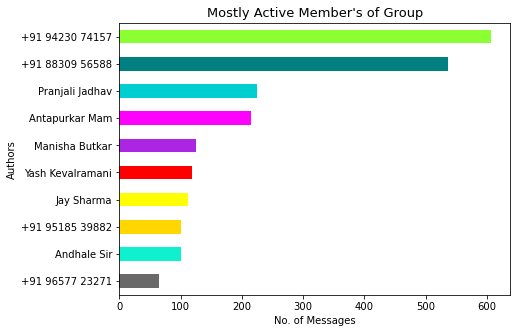

In [549]:
# Mostly Active Author in the Group
plt.figure(figsize=(7,5))
mostly_active = df1['Author'].value_counts()
# Top 10 peoples that are mostly active in our Group is : 
m_a = mostly_active.head(10)
m_a = m_a.sort_values()
m_a.plot.barh(color = ['#696969','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#8cff32'])
plt.ylabel('Authors')
plt.xlabel('No. of Messages')
plt.title('Mostly Active Member\'s of Group',fontdict={'fontsize': 13})
plt.show()

<a id="Mostly-active-day-of-week"></a>
### <Font color = 'ff0000'>Most active day of the week. 

<b>Most number of messages are sent on 'Friday' and 'Monday' doesn't seem to have much difference in no. of messages.   

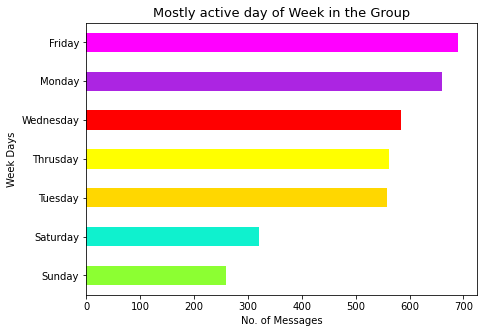

In [550]:
# Mostly Active day in the Group
plt.figure(figsize=(7,5))
active_day = df1['Day'].value_counts()
# Top 10 peoples that are mostly active in our Group is : 
a_d = active_day.head(10)
a_d = a_d.sort_values()
a_d.plot.barh(color = ['#8cff32','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff'])
plt.ylabel('Week Days')
plt.xlabel('No. of Messages')
plt.title('Mostly active day of Week in the Group',fontdict={'fontsize': 13})
plt.show()

<a id="media-con"></a>
### <Font color = 'ff0000'>Top-10 visual media contributor's of the Group. 

<b>Media is a most powerful entity on earth so let's see who is top visual media contributor's of this Group.

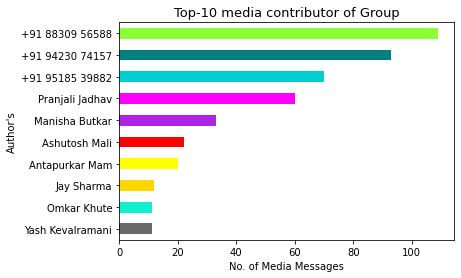

In [551]:
# Top-10 Media Contributor of Group
mm = df1[df1['Message'] == '<Media omitted>']
mm1 = mm['Author'].value_counts()
top10 = mm1.head(10)
top10 = top10.sort_values()
top10.plot.barh(color = ['#696969','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#8cff32'])
plt.ylabel('Author\'s')
plt.xlabel('No. of Media Messages')
plt.title('Top-10 media contributor of Group',fontdict={'fontsize': 13})
plt.show()

<a id="max-word"></a>
### <Font color = 'ff0000'>Top-10 Author who uses max no. of words in there messages.  

<b>Words are off course most powerful weapon in the world so let's see who has this powerful weapon in this group😅

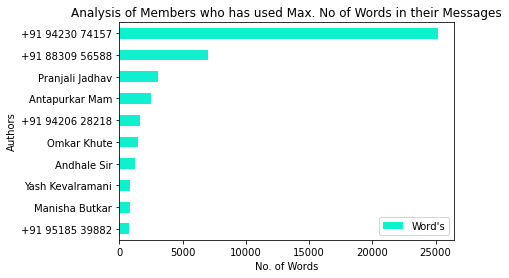

In [552]:
# Words are most powerful weapon in the world so lets check who has this powerful weapon in this Group 
max_words = df1[['Author','Word\'s']].groupby('Author').sum()
m_w = max_words.sort_values('Word\'s',ascending=False).head(10)
m_w = m_w.sort_values('Word\'s')
m_w.plot.barh(color = ['#0ff1ce'])
plt.ylabel('Authors')
plt.xlabel('No. of Words')
plt.title('Analysis of Members who has used Max. No of Words in their Messages')
plt.show()

<a id="max-link"></a>
### <Font color = 'ff0000'>Top-10 Authors who has shared max no. of links in Group. 

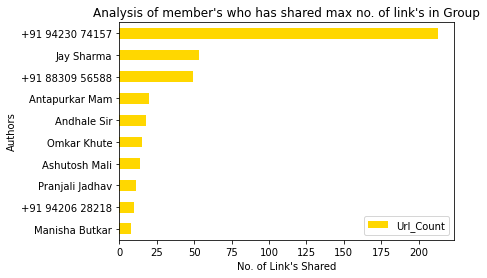

In [553]:
# Member who has shared max numbers of link in Group 
max_words = df1[['Author','Url_Count']].groupby('Author').sum()
m_w = max_words.sort_values('Url_Count',ascending=False).head(10)
# m_w
m_w = m_w.sort_values('Url_Count')
m_w.plot.barh(color = '#ffd700')
plt.ylabel('Authors')
plt.xlabel('No. of Link\'s Shared')
plt.title('Analysis of member\'s who has shared max no. of link\'s in Group')
plt.show()

<a id="time"></a>
### <Font color = 'ff0000'>Time whenever Group was high active. 

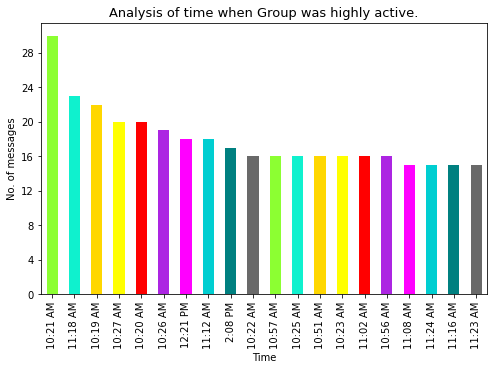

In [554]:
# Time whenever our group is mostly active
plt.figure(figsize=(8,5))
t = df1['Time'].value_counts().head(20)
tx = t.plot.bar(color = ['#8cff32','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#696969'])
tx.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Time')
plt.ylabel('No. of messages')
plt.title('Analysis of time when Group was highly active.',fontdict={'fontsize': 13})
plt.show()

### <Font color = 'ff0000'>Converting 12 hour formate to 24 Hour(Data Generation)  

In [555]:
# Converting 12 hour formate to 24 hour.
lst = []
for i in df1['Time'] : 
    out_time = datetime.strftime(datetime.strptime(i,"%I:%M %p"),"%H:%M")
    lst.append(out_time)

In [556]:
df1['24H_Time'] = lst

### <Font color = 'ff0000'>Updated Dataset. 

In [557]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01


In [558]:
df1['Hours'] = df1['24H_Time'].apply(lambda x : x.split(':')[0])

<a id="time-slot"></a>
###  <Font color = 'ff0000'>Most suitable Time Slot of the day, whenever there will be more chances of getting responce from group members.

<b>ex. Here 10 means time between 10:00 to 10:59.

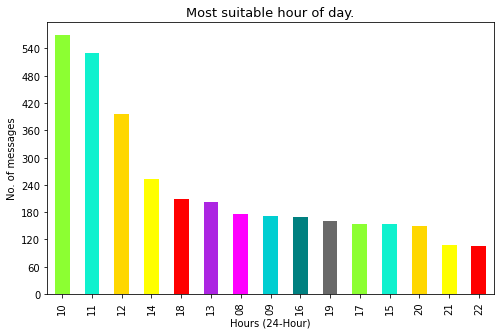

In [592]:
# Most suitable hour of day, whenever there will more chances of getting responce from group members.
plt.figure(figsize=(8,5))
std_time = df1['Hours'].value_counts().head(15)
s_T = std_time.plot.bar(color = ['#8cff32','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#696969'])
s_T.yaxis.set_major_locator(MaxNLocator(integer=True))  #Converting y axis data to integer
plt.xlabel('Hours (24-Hour)')
plt.ylabel('No. of messages')
plt.title('Most suitable hour of day.',fontdict={'fontsize': 13})
plt.show()

<a id="top5-word-cloud"></a>
### <Font color = 'ff0000'>Word Cloud of top-5 highly active member of Group.

--- Author :  +91 94230 74157 --- 


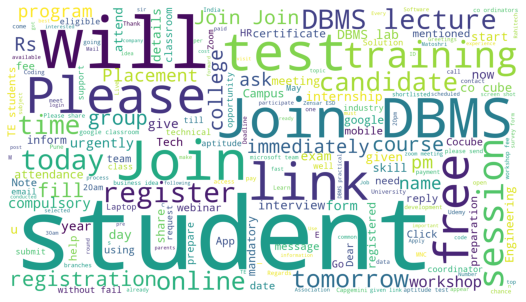

____________________________________________________________________________________

--- Author :  +91 88309 56588 --- 


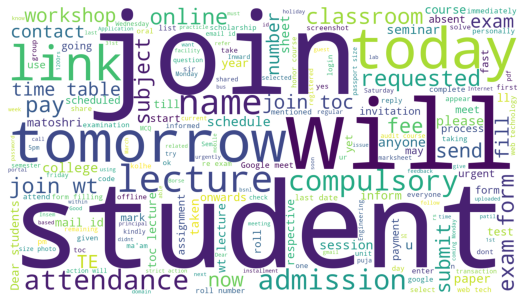

____________________________________________________________________________________

--- Author :  Pranjali Jadhav --- 


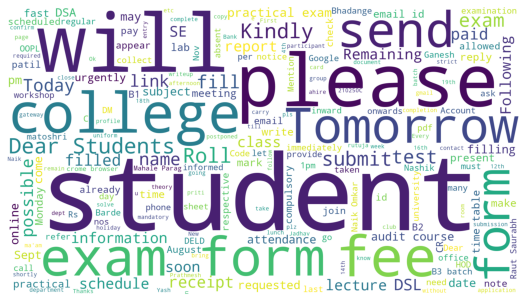

____________________________________________________________________________________

--- Author :  Antapurkar Mam --- 


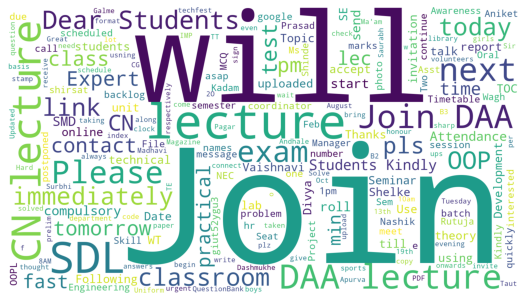

____________________________________________________________________________________

--- Author :  Manisha Butkar --- 


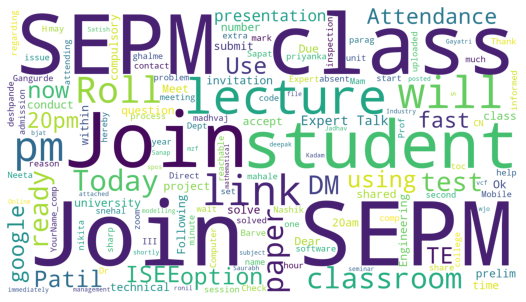

____________________________________________________________________________________



In [560]:
mostly_active_members = df1['Author'].value_counts()
active_m = list(mostly_active.head(5).index)
hindi = [chr(c) for c in range(0x0900, 0x097f)]
for i in range(len(active_m)) :
    # Filtering out messages of particular user
    m_chat = df1[df1["Author"] == active_m[i]]
    # preprocessing the messages...
    mcht2 = m_chat[~(m_chat['Message'].str.contains('<Media omitted>')) & 
                ~(m_chat['Message'].str.contains('This message was deleted')) &
                ~(m_chat['Message'].str.contains('https://')) &
                ~(m_chat.Message.str.contains('|'.join(hindi)))
                ]
    print(f'--- Author :  {active_m[i]} --- ')
    text = " ".join(review for review in mcht2.Message)
    wordcloud = WordCloud(width=1920, height=1080,background_color="white",stopwords=STOPWORDS,random_state=42).generate(text)
    plt.figure(figsize=(9,4))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    print('____________________________________________________________________________________\n')

<a id="date-on"></a>
### <Font color = 'ff0000'>Date on which Group was highly active. 

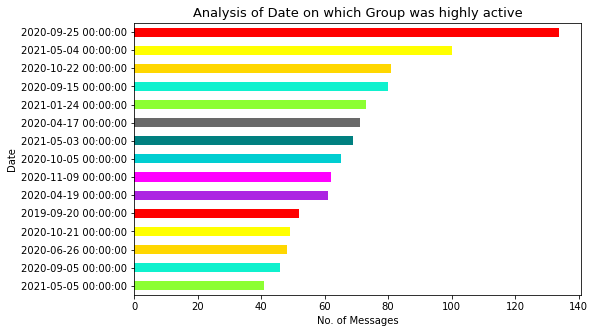

In [561]:
# Date on which our Group was highly active.
plt.figure(figsize=(8,5))
x = df1['Date'].value_counts().head(15).sort_values()
x.plot.barh(color = ['#8cff32','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#696969'])
plt.ylabel('Date')
plt.xlabel('No. of Messages')
plt.title('Analysis of Date on which Group was highly active',fontdict={'fontsize': 13})
plt.show()

### <Font color = 'ff0000'>Updated Dataset 

In [562]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17


<a id="time-series-plot"></a>
### <Font color = 'ff0000'>Analysis of no. of messages using Time Series Plot. 

In [563]:
z = df1['Date'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df1['Msg_count'] = df1['Date'].map(z1)

In [564]:
# Timeseries plot 
fig = px.line(x=df1['Date'], y=df1['Msg_count'], template='none', labels = {'x' : "Month-Year", 'y' : 'No. of Messages'})
fig.update_layout(title='Analysis of number of message\'s using TimeSeries plot.',
                  xaxis_title = 'Month-Year',
                  yaxis_title = 'No. of Messages')
fig.update_xaxes(nticks=20)
fig.update_traces(line_color='red')
fig.show()

### <Font color = 'ff0000'>Adding one more column as Year for  better analysis (Feature Generation) 

In [565]:
df1['Year'] = df1['Date'].dt.year

### <Font color = 'ff0000'>Updated Dataset

In [566]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019


### <Font color = 'ff0000'>Adding Month column in dataset for better analysis (Feature Generation) 

In [567]:
df1['Mon'] = df1['Date'].dt.month

In [568]:
months = {
     1 : 'Jan',
     2 : 'Feb',
     3 : 'Mar',
     4 : 'Apr',
     5 : 'May',
     6 : 'Jun',
     7 : 'Jul',
     8 : 'Aug',
     9 : 'Sep',
    10 : 'Oct',
    11 : 'Nov',
    12 : 'Dec'
}
df1['Month'] = df1['Mon'].map(months)

In [569]:
df1.drop('Mon',axis=1,inplace=True)

### <Font color = 'ff0000'>Updated Dataset

In [570]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul


### <Font color = 'ff0000'>Combining Month and Year column (Feature Generation)

In [571]:
df1["Month_Year"] = df1.apply(lambda x : x["Month"] + " " + str(x["Year"]), axis=1)

### <Font color = 'ff0000'>Updated Dataset 

In [572]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019


In [573]:
l = df1.Month_Year.unique()
print('No. of messages sent in particular month.\n')
for i in range(len(l)):
  # Filtering out messages of particular user
  req_df = df1[df1["Month_Year"] == l[i]]
  # req_df will contain messages of only one particular user
  print(l[i],'  ->  ',req_df.shape[0])   

No. of messages sent in particular month.

Jul 2019   ->   20
Aug 2019   ->   51
Sep 2019   ->   140
Oct 2019   ->   98
Nov 2019   ->   27
Dec 2019   ->   44
Jan 2020   ->   65
Feb 2020   ->   159
Mar 2020   ->   72
Apr 2020   ->   155
May 2020   ->   66
Jun 2020   ->   80
Jul 2020   ->   140
Aug 2020   ->   135
Sep 2020   ->   440
Oct 2020   ->   360
Nov 2020   ->   231
Dec 2020   ->   170
Jan 2021   ->   176
Feb 2021   ->   79
Mar 2021   ->   163
Apr 2021   ->   68
May 2021   ->   395
Jun 2021   ->   227
Jul 2021   ->   74


<a id="active-month"></a>
### <Font color = 'ff0000'>Mostly active month

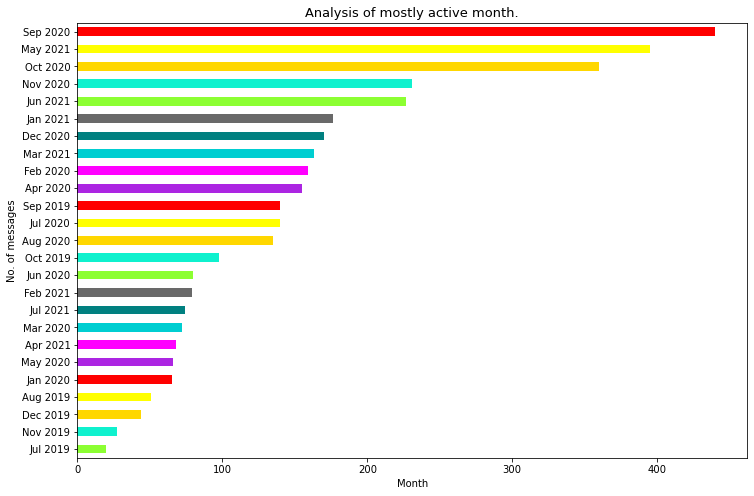

In [593]:
# Mostly Active month 
plt.figure(figsize=(12,8))
a_m = df1['Month_Year'].value_counts()
a_m = a_m.sort_values()
a_m.plot.barh(color = ['#8cff32','#0ff1ce','#ffd700',
                      '#ffff00','#ff0000','#ac25e2','#ff00ff','#00ced1','#008080','#696969'])
plt.xlabel('Month')
plt.ylabel('No. of messages')
plt.title('Analysis of mostly active month.',fontdict={'fontsize': 13})
plt.show()

### <Font color = 'ff0000'>Calculating no. of messages sent in each month (Feature Generation) 

In [575]:
z = df1['Month_Year'].value_counts() 
z1 = z.to_dict() #converts to dictionary
df1['Msg_count_monthly'] = df1['Month_Year'].map(z1)

### <Font color = 'ff0000'>Updated Dataset 

In [576]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year,Msg_count_monthly
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019,20
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019,20


<a id="line-plot"></a>
### <Font color = 'ff0000'>Analysis of mostly active month using Line Plot. 

In [577]:
fig = px.line(data_frame=df1,x='Month_Year',y='Msg_count_monthly',template='none',title='Analysis of Mostly Active Month',
             labels={
                     "Month_Year": "Month-Year",
                     "Msg_count_monthly": "No of Messages",
                 })
fig.update_traces(line_color='red',mode='markers+lines')
fig.show()

In [578]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year,Msg_count_monthly
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019,20
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019,20


<a id="active-year"></a>
### <Font color = 'ff0000'>Most Active year 

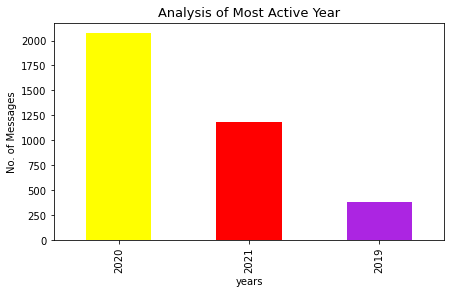

In [579]:
#Total message per year
# As we analyse that the group is created in mid 2019 thats why number of messages in 2019 is less.
plt.figure(figsize=(7,4))
a_m = df1['Year'].value_counts()
a_m.plot.bar(color = ['#ffff00','#ff0000','#ac25e2'])
plt.xlabel('years')
# plt.xticks(rotation = 45)
plt.ylabel('No. of Messages')
plt.title('Analysis of Most Active Year',fontdict={'fontsize': 13})
plt.show()

<a id="heat-map"></a>
### <Font color = 'ff0000'>Analysis of Day and Time when our Group was highly active.

In [580]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year,Msg_count_monthly
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019,20
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019,20


In [581]:
df1['id'] = df1.index

In [582]:
df1.head(2)

,Date,Day,Time,Author,Message,Letter's,Word's,Url_Count,Media_Count,24H_Time,Hours,Msg_count,Year,Month,Month_Year,Msg_count_monthly,id
0,2019-07-09,Tuesday,5:00 PM,Saurabh Waje,"Hii there, our official gmail group of se comp...",137,15,1,0,17:00,17,3,2019,Jul,Jul 2019,20,0
1,2019-07-09,Tuesday,5:01 PM,Saurabh Waje,mcoerc-se-comp2019-20@googlegroups.com This is...,60,5,0,0,17:01,17,3,2019,Jul,Jul 2019,20,1


In [583]:
# if we want to transform data both column wise as well as row wise then we will preffer pivot table.
htmp = pd.DataFrame(pd.pivot_table(df1, index=['Day'], values = 'id',columns='Hours', aggfunc = 'count'))

In [584]:
htmp

Hours,00,01,02,03,05,06,07,08,09,10,...,14,15,16,17,18,19,20,21,22,23
Day,,,,,,,,,,,,,,,,,,,,,
Friday,0,0,0,0,0,3,8,18,19,58,...,41,25,60,48,60,38,73,39,23,15
Monday,1,1,0,0,0,0,6,24,41,143,...,64,26,18,8,29,25,17,8,19,6
Saturday,3,0,0,0,0,0,8,23,21,51,...,19,20,12,6,8,3,17,26,2,7
Sunday,3,0,0,1,0,0,5,9,13,10,...,33,32,23,17,15,15,13,2,8,7
Thrusday,4,1,1,0,1,3,5,35,23,95,...,37,15,26,33,26,11,14,4,24,5
Tuesday,0,0,0,0,0,0,8,36,36,79,...,37,13,10,13,45,43,12,10,18,3
Wednesday,4,1,0,0,2,1,11,30,18,133,...,22,22,21,29,25,25,4,19,12,7


In [591]:
fig = px.imshow(htmp,
                labels = dict(x="Hour(00:59) ", y="Weekday ", color = 'No. of messages '),
                y = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday'],
                title = 'Weekdays VS Hours Chat Analysis',
                color_continuous_scale='purples')

fig.update_xaxes(side="top")
fig.update_layout(width=990,
    height=505,coloraxis_colorbar=dict(
    title="No. of Messages ",
    thicknessmode="pixels", thickness=30,
    lenmode="pixels", len=305,
    yanchor="top", y=1,
    ticks=None, ticksuffix=" Messages",
    dtick = 50
))
fig.show()

<b>The darker the color, higher no. of messages sent at that time and week day.

# 

<Font color='FF031D'><center>Made with ❤ by Ronil</center>